In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Q1 Salary_hike -> Build a prediction model for Salary_hike

In [2]:
q1 = pd.read_csv("Salary_Data.csv")
q1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
q1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

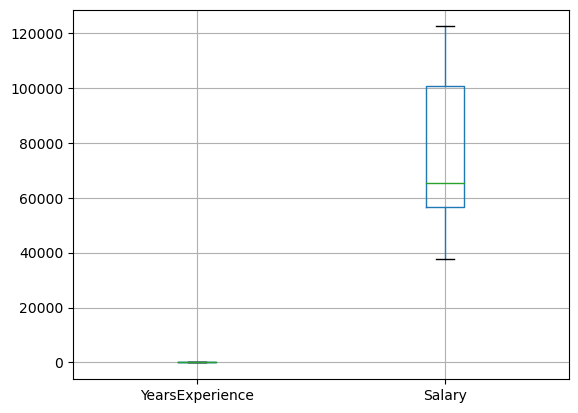

In [4]:
# first we should check for an outlier
q1.boxplot()

In [5]:
q1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

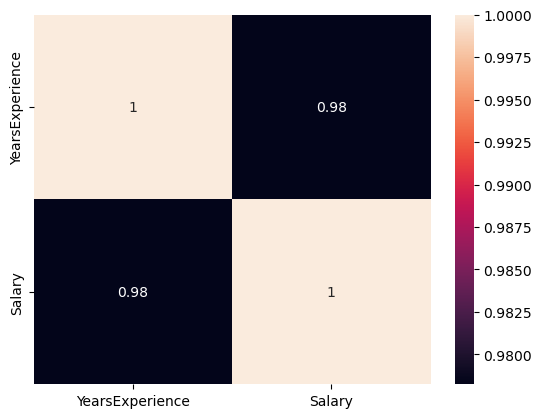

In [6]:
sns.heatmap(q1.corr(),annot=True)

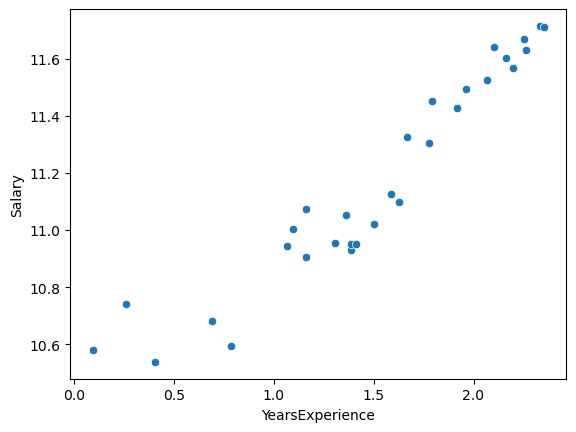

In [7]:
sns.scatterplot(x = np.log(q1['YearsExperience']),y = np.log(q1['Salary']))
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

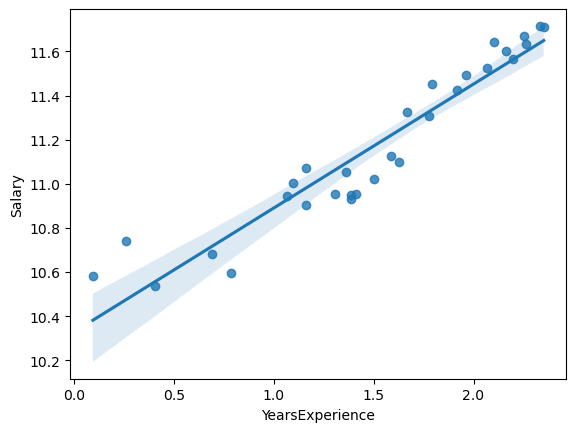

In [8]:
sns.regplot(x=np.log(q1['YearsExperience']),y=np.log(q1['Salary']))

##### Model Building

In [9]:
import statsmodels.formula.api as smf

In [10]:
model=smf.ols('Salary~YearsExperience',data=q1).fit()

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.rsquared

0.9569566641435086

##### Predicting new values

In [13]:
test_data=pd.DataFrame({
    'YearsExperience':[4,8,9,7]
})
test_data

,YearsExperience
0,4
1,8
2,9
3,7


In [14]:
model.predict(test_data)

0     63592.049484
1    101391.898770
2    110841.861092
3     91941.936449
dtype: float64

#### Q2 Delivery_time -> Predict delivery time using sorting time

In [15]:
q2=pd.read_csv("delivery_time.csv")
q2.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
q2=q2.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
q2.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [17]:
q2.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: >

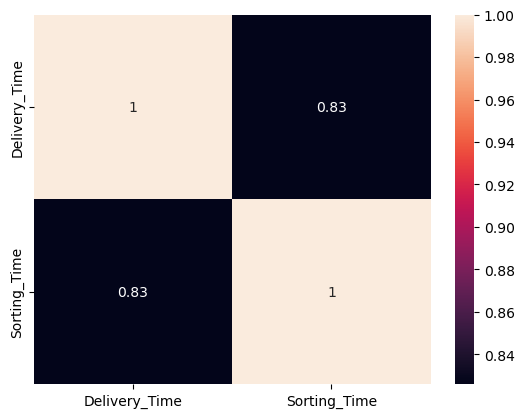

In [18]:
sns.heatmap(q2.corr(),annot=True)

<Axes: >

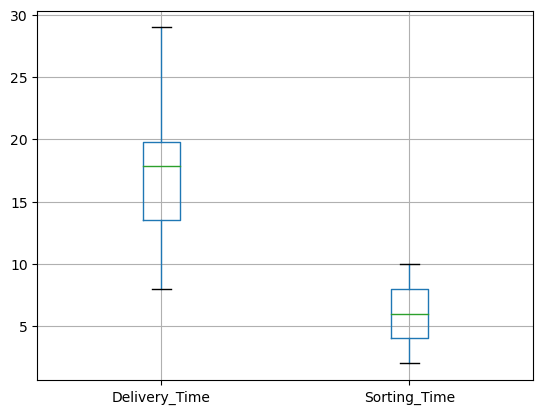

In [19]:
q2.boxplot()

In [20]:
q2.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


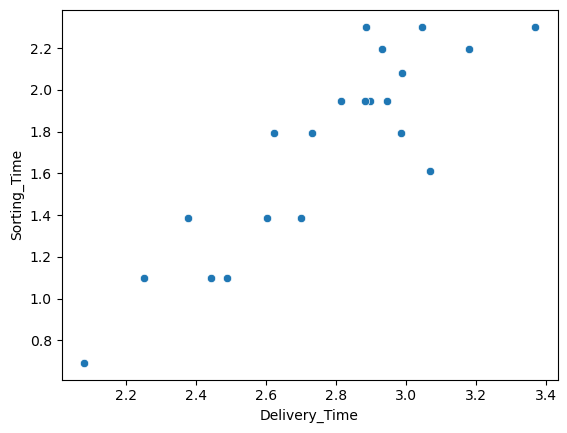

In [21]:
sns.scatterplot(x=np.log(q2['Delivery_Time']),y=np.log(q2['Sorting_Time']))
plt.show()

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

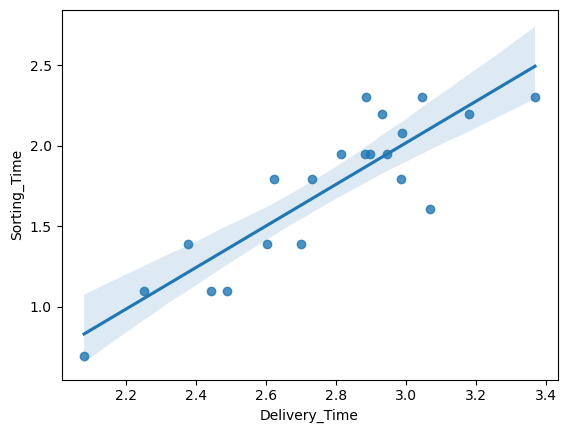

In [22]:
sns.regplot(x=np.log(q2['Delivery_Time']),y=np.log(q2['Sorting_Time']))

##### Model Building

In [23]:
model1 = smf.ols('Delivery_Time~Sorting_Time',data=q2).fit()

In [24]:
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [25]:
model1.rsquared

0.6822714748417231

In [26]:
# to increase accuracy we will take log of columns

In [27]:
# taking log of independent column to improve accuracy
model1=smf.ols('Delivery_Time~np.log(Sorting_Time)',data=q2).fit()
model1.rsquared

0.6954434611324223

In [28]:
# taking log of target column to get improved accuracy
model1=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=q2).fit()
model1.rsquared

0.7109478980584187

In [29]:
# taking log of both columns
model1=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=q2).fit()
model1.rsquared

0.77216134926874

##### Prediction on new data

In [30]:
test_data1 = pd.DataFrame({'Sorting_Time':[15,19,23,25]})
test_data1

,Sorting_Time
0,15
1,19
2,23
3,25


In [31]:
np.exp(model1.predict(test_data1))

0    28.792287
1    33.160358
2    37.170480
3    39.069311
dtype: float64